In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv("/content/Wine_clust .csv")

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
# Specify the features for clustering
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
            'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
            'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

In [7]:
X = data[features].values

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
import seaborn as sns

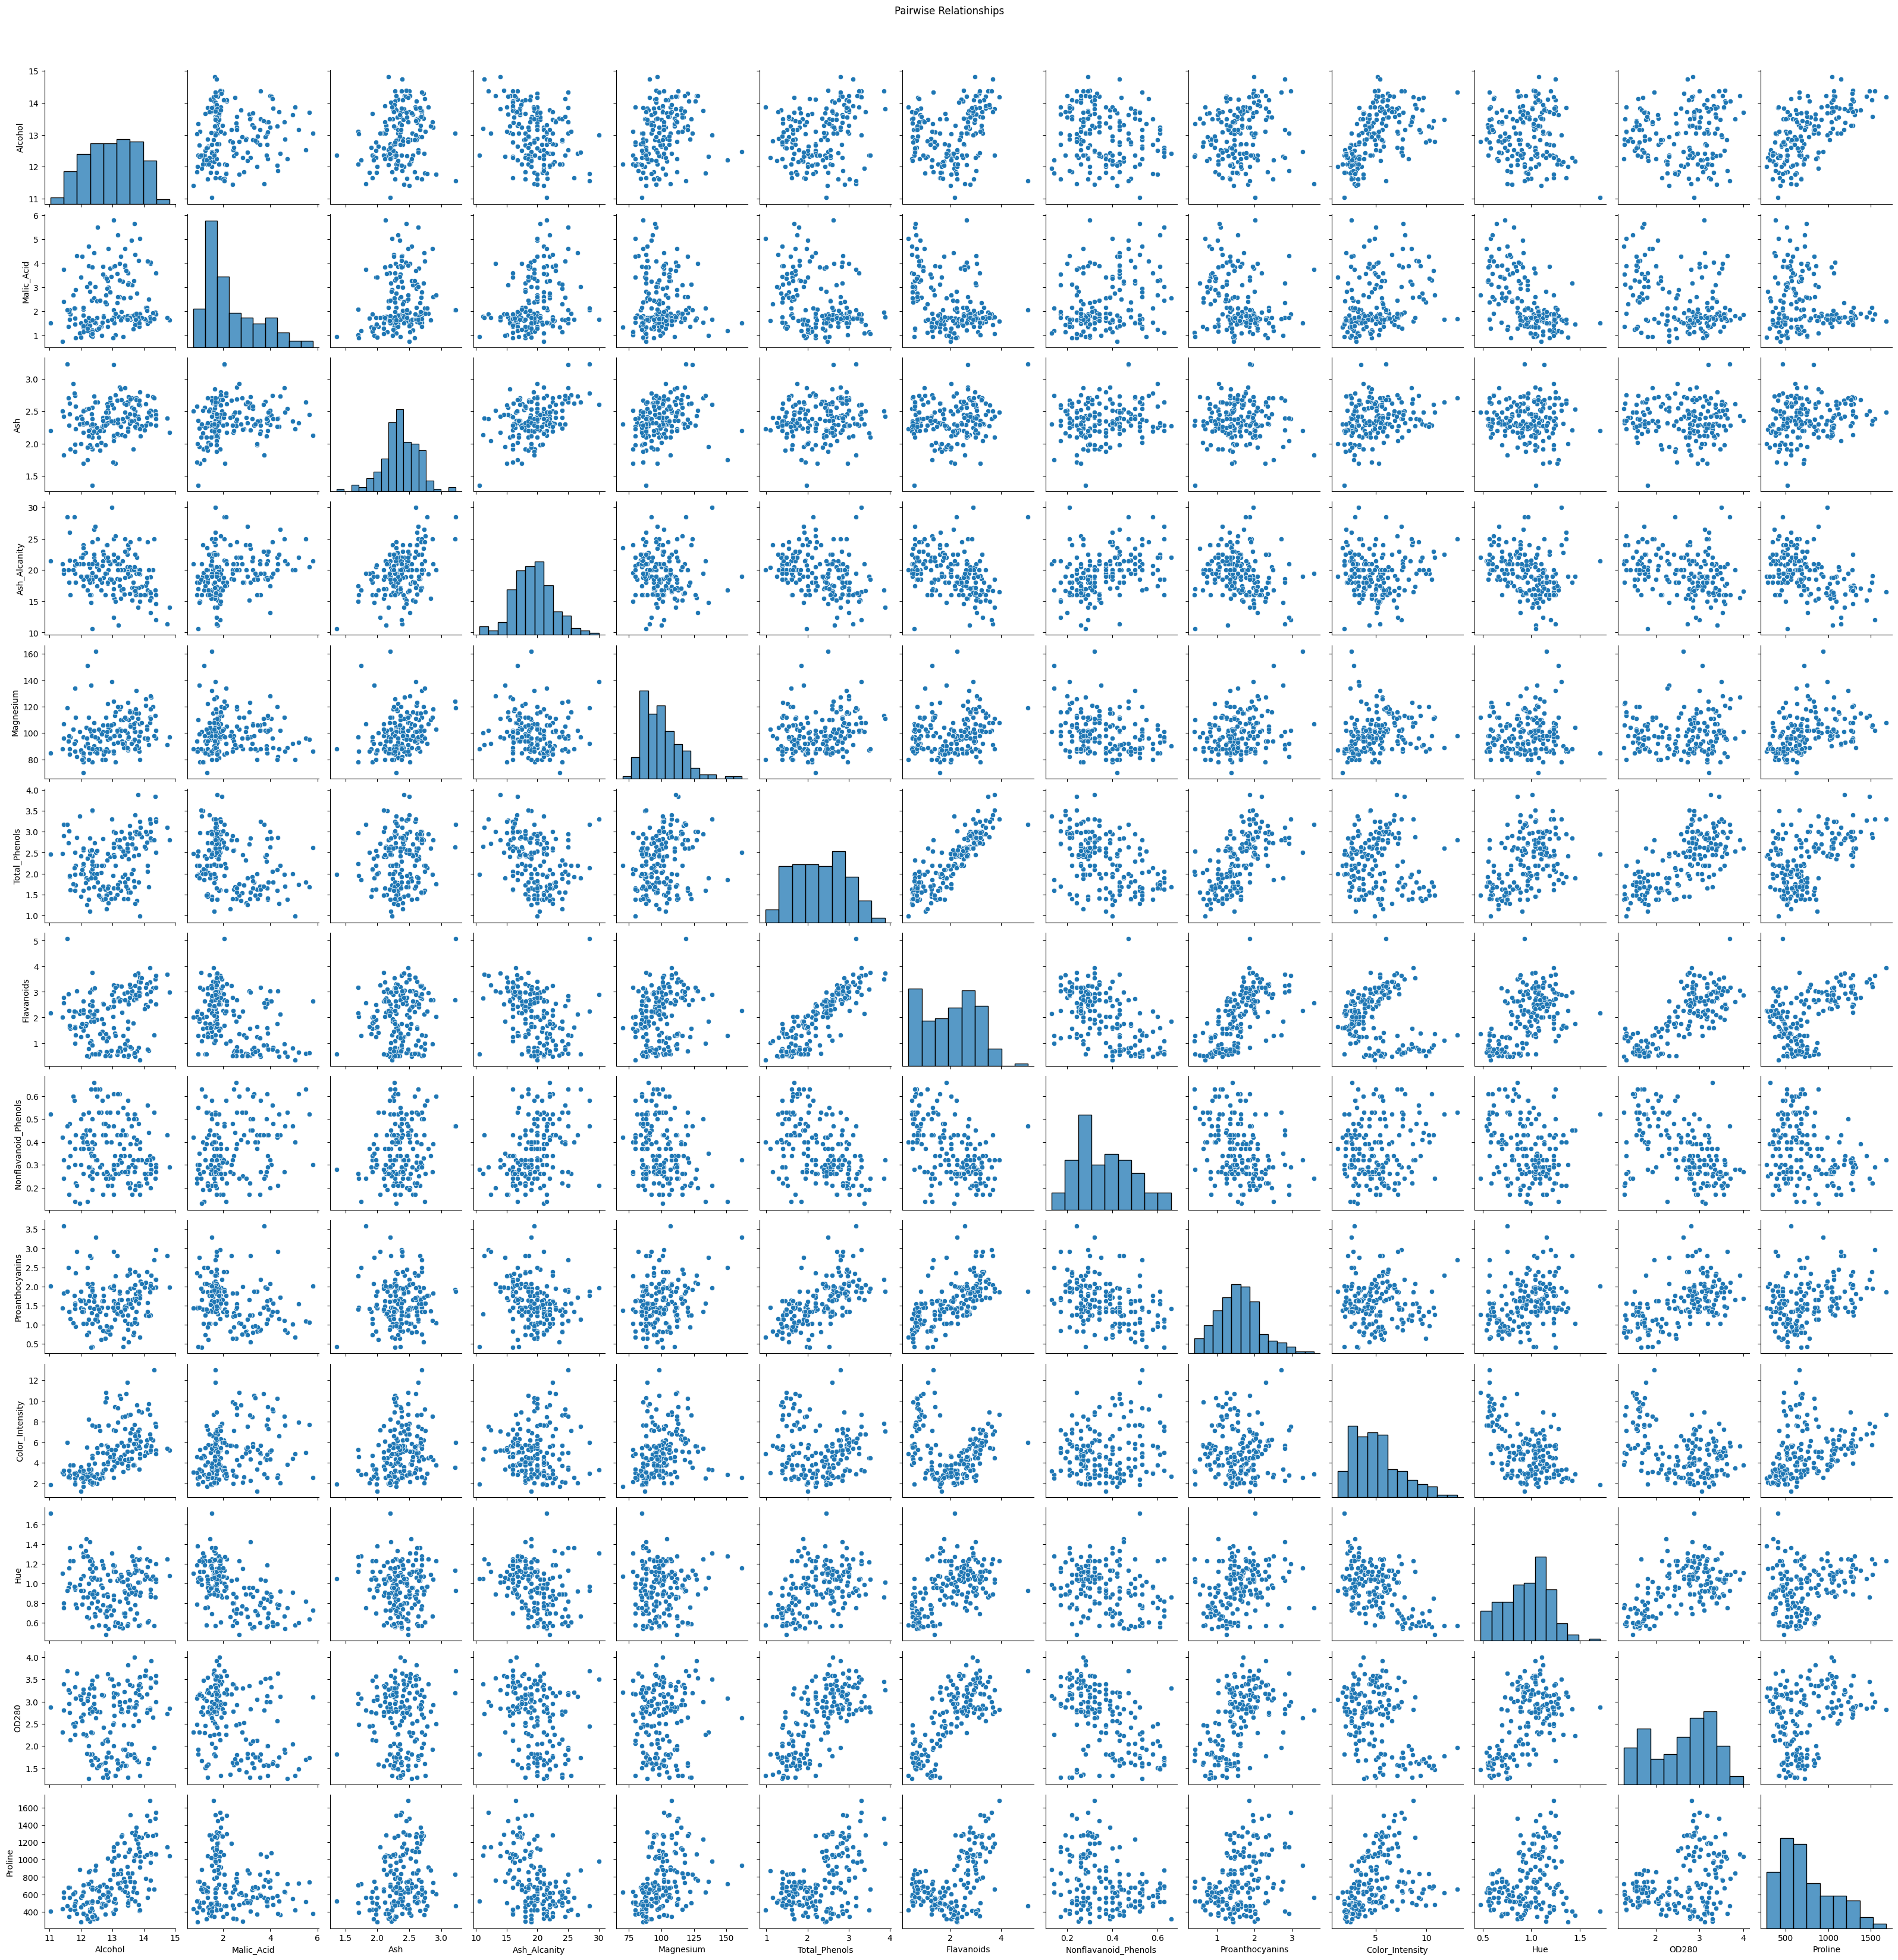

In [10]:
# Visualize pairwise relationships between features
sns.pairplot(data[features])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


In [11]:
# Function to find the optimal number of clusters using K-means
def find_optimal_kmeans(X):
    scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        scores.append(score)
    optimal_k = scores.index(max(scores)) + 2
    return optimal_k

In [12]:
# Function to find the optimal number of clusters using Hierarchical Agglomerative Clustering
def find_optimal_hierarchy(X):
    scores = []
    for k in range(2, 11):
        linkage_matrix = linkage(X, method='ward')
        hierarchical = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
        hierarchical.fit(X)
        score = silhouette_score(X, hierarchical.labels_)
        scores.append(score)
    optimal_k = scores.index(max(scores)) + 2
    return optimal_k

In [13]:
# Function to perform DBSCAN clustering
def perform_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    return dbscan.labels_

In [14]:
# Find optimal number of clusters for K-means
optimal_kmeans = find_optimal_kmeans(X_scaled)
print("Optimal number of clusters for K-means:", optimal_kmeans)

# Find optimal number of clusters for Hierarchical Agglomerative Clustering
optimal_hierarchy = find_optimal_hierarchy(X_scaled)
print("Optimal number of clusters for Hierarchical Agglomerative Clustering:", optimal_hierarchy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal number of clusters for K-means: 3
Optimal number of clusters for Hierarchical Agglomerative Clustering: 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

In [15]:
# Choose the best clustering model based on silhouette score
if optimal_kmeans >= optimal_hierarchy:
    best_model = KMeans(n_clusters=optimal_kmeans, random_state=42)
    cluster_labels = best_model.fit_predict(X_scaled)
else:
    best_model = AgglomerativeClustering(n_clusters=optimal_hierarchy, affinity='euclidean', linkage='ward')
    cluster_labels = best_model.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


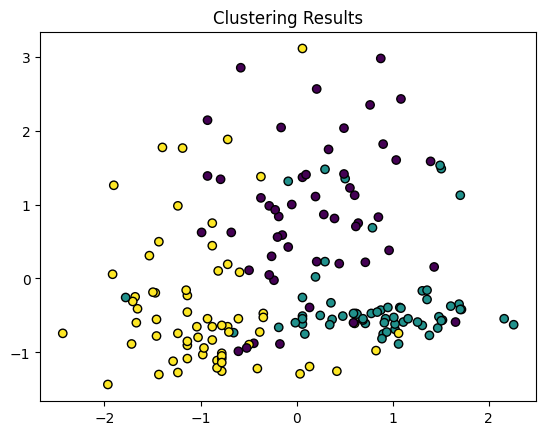

In [16]:
# Visualize the clustering results
# For K-means and Hierarchical Agglomerative Clustering
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('Clustering Results')
plt.show()

In [17]:
# Perform DBSCAN clustering
eps = 0.5
min_samples = 5
dbscan_labels = perform_dbscan(X_scaled, eps, min_samples)

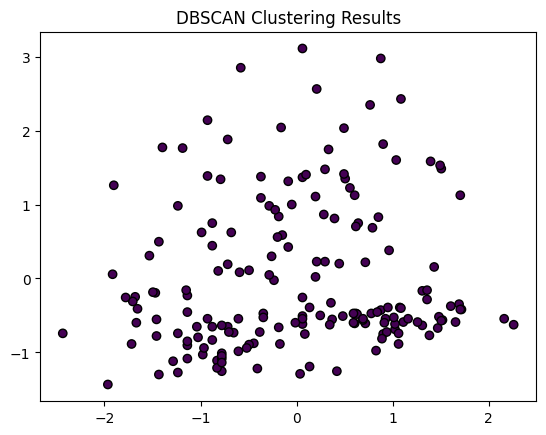

In [18]:
# Visualize the DBSCAN clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('DBSCAN Clustering Results')
plt.show()